<a href="https://colab.research.google.com/github/aueskinj/Data-Science-Projects/blob/main/Effect_of_taxation_on_sme_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import kruskal
from scipy.stats import ttest_rel
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [ ]:
revenues = pd.read_csv('/content/Revenues.csv')

In [ ]:
data = pd.read_csv('/content/data.csv')

In [ ]:
df = data

In [ ]:
revenues.insert(0, 'Respondent_ID', range(1, 104))

In [ ]:
revenues.columns

Index(['Respondent_ID', 'ENTERPRISE NAME ', 'PREVIOUS YEAR REVENUE',
       'CURRENT YEAR REVENUE'],
      dtype='object')

In [ ]:
revenues['CURRENT YEAR REVENUE'] = pd.to_numeric(revenues['CURRENT YEAR REVENUE'], errors='coerce')

In [ ]:
revenues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Respondent_ID          103 non-null    int64  
 1   ENTERPRISE NAME        103 non-null    object 
 2   PREVIOUS YEAR REVENUE  103 non-null    float64
 3   CURRENT YEAR REVENUE   102 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ KB


In [ ]:
merged_df = pd.merge(df, revenues, on='Respondent_ID', how='inner')

In [ ]:
data = merged_df.drop('ENTERPRISE NAME ', axis=1)

In [ ]:
data.head(10)

,Unnamed: 0,Respondent_ID,2,2B,3B,4B,4C,4D,5,5B,5C,5D,5E,5F,PREVIOUS YEAR REVENUE,CURRENT YEAR REVENUE
0,0,1,1,3,4,3,1,1,3,0,1,1,0,0,3.40,2.10
1,1,2,0,2,4,2,1,1,2,1,2,1,0,1,3.30,1.70
2,2,3,1,2,4,1,1,2,3,0,1,0,0,0,1.60,1.00
3,3,4,1,3,3,1,1,2,3,1,3,0,0,0,1.00,0.80
4,4,5,1,3,4,2,1,1,3,1,1,1,0,1,3.00,2.00
5,5,6,1,3,3,2,1,1,3,1,2,0,0,0,0.75,0.43
6,6,7,1,3,3,3,1,1,3,1,1,0,0,1,0.80,0.45
7,7,8,0,1,4,3,0,1,3,0,3,1,0,0,0.50,0.20
8,8,9,1,2,4,2,1,1,3,1,2,0,0,0,2.40,1.30
9,9,10,1,2,4,4,1,1,3,1,2,1,0,1,3.40,3.60


In [ ]:
# Descriptive statistics
descriptive_stats = data.describe()
print(descriptive_stats)

       Unnamed: 0  Respondent_ID           2          2B          3B  \
count  103.000000     103.000000  103.000000  103.000000  103.000000   
mean    51.000000      52.000000    0.766990    2.320388    3.621359   
std     29.877528      29.877528    0.424816    0.842657    0.930070   
min      0.000000       1.000000    0.000000    1.000000    1.000000   
25%     25.500000      26.500000    1.000000    2.000000    3.000000   
50%     51.000000      52.000000    1.000000    2.000000    4.000000   
75%     76.500000      77.500000    1.000000    3.000000    4.000000   
max    102.000000     103.000000    1.000000    4.000000    5.000000   

               4B          4C          4D           5          5B          5C  \
count  103.000000  103.000000  103.000000  103.000000  103.000000  103.000000   
mean     2.320388    0.776699    1.456311    2.747573    0.650485    1.650485   
std      0.992260    0.418495    0.573546    0.537212    0.479148    0.621648   
min      1.000000    0.0000

In [ ]:
descriptive_stats.to_csv('descriptive_stats.csv', index = True, encoding='utf-8')

<Figure size 1500x800 with 0 Axes>

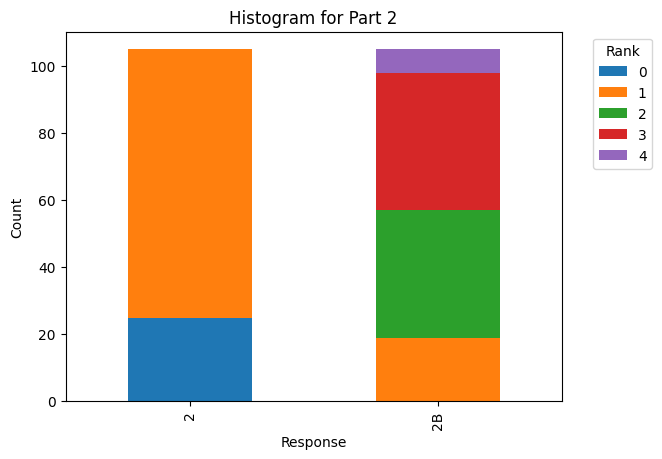

<Figure size 1500x800 with 0 Axes>

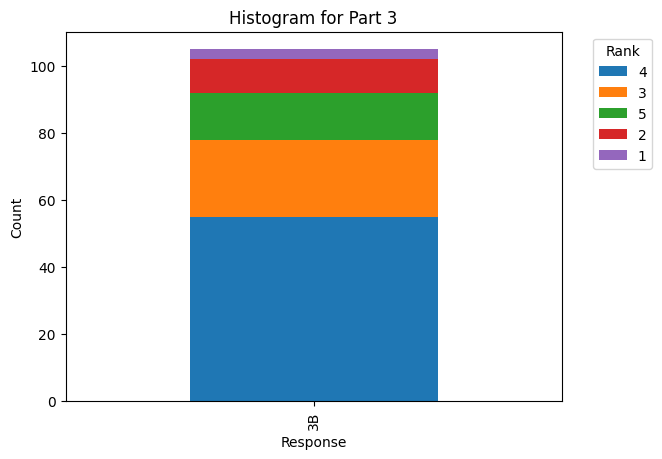

<Figure size 1500x800 with 0 Axes>

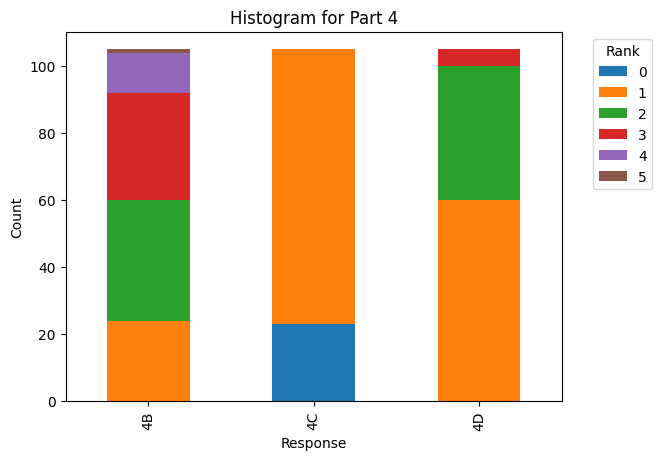

<Figure size 1500x800 with 0 Axes>

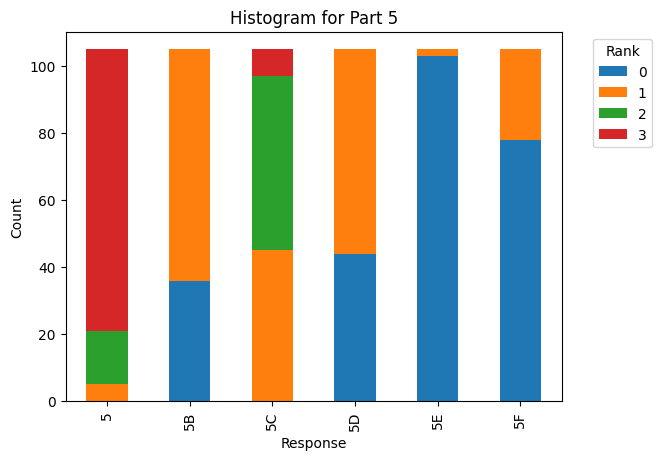

In [ ]:
parts = ['2', '3', '4', '5']

for part in parts:
    part_columns = [col for col in df.columns if col.startswith(part)]
    plt.figure(figsize=(15, 8))
    df[part_columns].apply(pd.Series.value_counts).T.plot(kind='bar', stacked=True)
    plt.title(f'Histogram for Part {part}')
    plt.xlabel('Response')
    plt.ylabel('Count')
    plt.legend(title='Rank', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

## Frequency Analysis

### Most Common responses

In [ ]:
for column in df.columns:
    if column != 'Respondent_ID':  # Exclude the Respondent_ID column from the analysis
        print(f"\nFrequency distribution for {column}:")
        print(df[column].value_counts())

        # Display the most common and least common responses
        most_common = df[column].value_counts().idxmax()
        least_common = df[column].value_counts().idxmin()
        print(f"Most common response: {most_common}")
        print(f"Least common response: {least_common}\n")


Frequency distribution for Unnamed: 0:
0      1
53     1
77     1
76     1
75     1
      ..
32     1
31     1
30     1
29     1
104    1
Name: Unnamed: 0, Length: 105, dtype: int64
Most common response: 0
Least common response: 0


Frequency distribution for 2:
1    80
0    25
Name: 2, dtype: int64
Most common response: 1
Least common response: 0


Frequency distribution for 2B:
3    41
2    38
1    19
4     7
Name: 2B, dtype: int64
Most common response: 3
Least common response: 4


Frequency distribution for 3B:
4    55
3    23
5    14
2    10
1     3
Name: 3B, dtype: int64
Most common response: 4
Least common response: 1


Frequency distribution for 4B:
2    36
3    32
1    24
4    12
5     1
Name: 4B, dtype: int64
Most common response: 2
Least common response: 5


Frequency distribution for 4C:
1    82
0    23
Name: 4C, dtype: int64
Most common response: 1
Least common response: 0


Frequency distribution for 4D:
1    60
2    40
3     5
Name: 4D, dtype: int64
Most common response:

**Percentage Distribution**

In [ ]:
for column in df.columns:
    if column != 'Respondent_ID':
        print(f"\nPercentage distribution for {column}:")
        print(df[column].value_counts(normalize=True) * 100)


Percentage distribution for Unnamed: 0:
0      0.952381
53     0.952381
77     0.952381
76     0.952381
75     0.952381
         ...   
32     0.952381
31     0.952381
30     0.952381
29     0.952381
104    0.952381
Name: Unnamed: 0, Length: 105, dtype: float64

Percentage distribution for 2:
1    76.190476
0    23.809524
Name: 2, dtype: float64

Percentage distribution for 2B:
3    39.047619
2    36.190476
1    18.095238
4     6.666667
Name: 2B, dtype: float64

Percentage distribution for 3B:
4    52.380952
3    21.904762
5    13.333333
2     9.523810
1     2.857143
Name: 3B, dtype: float64

Percentage distribution for 4B:
2    34.285714
3    30.476190
1    22.857143
4    11.428571
5     0.952381
Name: 4B, dtype: float64

Percentage distribution for 4C:
1    78.095238
0    21.904762
Name: 4C, dtype: float64

Percentage distribution for 4D:
1    57.142857
2    38.095238
3     4.761905
Name: 4D, dtype: float64

Percentage distribution for 5:
3    80.000000
2    15.238095
1     4.761905

In [ ]:
numeric_columns = ['PREVIOUS YEAR REVENUE', 'CURRENT YEAR REVENUE']
print("\nSummary statistics for numeric columns:")
print(data[numeric_columns].describe())


Summary statistics for numeric columns:
       PREVIOUS YEAR REVENUE  CURRENT YEAR REVENUE
count             103.000000            102.000000
mean                1.566117              1.280098
std                 1.710747              1.596691
min                 0.050000              0.030000
25%                 0.475000              0.400000
50%                 0.890000              0.700000
75%                 2.350000              1.775000
max                 9.800000             10.000000


In [ ]:
revenues.describe().to_csv("revenue_descriptive.csv")

Contigency Tables and Chi-Squares

In [ ]:
for column1 in df.columns:
    if column1 != 'Respondent_ID':
        for column2 in df.columns:
            if column2 != 'Respondent_ID' and column1 != column2:
                cross_tab = pd.crosstab(df[column1], df[column2])
                print(f"\nCross-tabulation between '{column1}' and '{column2}':")
                print(cross_tab)


Cross-tabulation between 'Unnamed: 0' and '2':
2           0  1
Unnamed: 0      
0           0  1
1           1  0
2           0  1
3           0  1
4           0  1
...        .. ..
100         0  1
101         0  1
102         0  1
103         0  1
104         1  0

[105 rows x 2 columns]

Cross-tabulation between 'Unnamed: 0' and '2B':
2B          1  2  3  4
Unnamed: 0            
0           0  0  1  0
1           0  1  0  0
2           0  1  0  0
3           0  0  1  0
4           0  0  1  0
...        .. .. .. ..
100         0  0  0  1
101         0  0  1  0
102         0  1  0  0
103         0  0  0  1
104         0  0  1  0

[105 rows x 4 columns]

Cross-tabulation between 'Unnamed: 0' and '3B':
3B          1  2  3  4  5
Unnamed: 0               
0           0  0  0  1  0
1           0  0  0  1  0
2           0  0  0  1  0
3           0  0  1  0  0
4           0  0  0  1  0
...        .. .. .. .. ..
100         0  0  0  1  0
101         0  1  0  0  0
102         1  0  0  0  0


In [ ]:
# Create a list of categorical columns (excluding 'Respondent_ID')
df.columns

Index(['Unnamed: 0', 'Respondent_ID', '2', '2B', '3B', '4B', '4C', '4D', '5',
       '5B', '5C', '5D', '5E', '5F'],
      dtype='object')

In [ ]:
categorical_columns = ['2', '2B', '3B', '4B', '4C', '4D', '5', '5B', '5C', '5D', '5E', '5F']

In [ ]:
# Perform chi-square tests for all pairs of categorical variables
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        variable1 = categorical_columns[i]
        variable2 = categorical_columns[j]

        # Create a contingency table
        contingency_table = pd.crosstab(df[variable1], df[variable2])

        # Perform the chi-square test
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

        # Display the results
        print(f"\nChi-square test for independence between '{variable1}' and '{variable2}':")
        print(f"Chi-square statistic: {chi2_stat}")
        print(f"P-value: {p_value}")
        print(f"Degrees of freedom: {dof}")
        print("Contingency Table:")
        print(contingency_table)
        print("Expected Frequencies:")
        print(expected)


Chi-square test for independence between '2' and '2B':
Chi-square statistic: 0.6254172015404368
P-value: 0.8905898238369645
Degrees of freedom: 3
Contingency Table:
2B   1   2   3  4
2                
0    5  10   9  1
1   14  28  32  6
Expected Frequencies:
[[ 4.52380952  9.04761905  9.76190476  1.66666667]
 [14.47619048 28.95238095 31.23809524  5.33333333]]

Chi-square test for independence between '2' and '3B':
Chi-square statistic: 2.238201581027668
P-value: 0.6920417815482327
Degrees of freedom: 4
Contingency Table:
3B  1  2   3   4   5
2                   
0   1  3   3  15   3
1   2  7  20  40  11
Expected Frequencies:
[[ 0.71428571  2.38095238  5.47619048 13.0952381   3.33333333]
 [ 2.28571429  7.61904762 17.52380952 41.9047619  10.66666667]]

Chi-square test for independence between '2' and '4B':
Chi-square statistic: 1.736328125
P-value: 0.7841084817230539
Degrees of freedom: 4
Contingency Table:
4B   1   2   3  4  5
2                   
0    5   7   9  4  0
1   19  29  23  8

In [ ]:
# Create a list of numeric columns
numeric_columns = [col for col in df.columns if col != 'Respondent_ID' and pd.api.types.is_numeric_dtype(df[col])]

# Perform Kruskal-Wallis H-test for all pairs of numeric variables
for i in range(len(numeric_columns)):
    for j in range(i + 1, len(numeric_columns)):
        variable1 = numeric_columns[i]
        variable2 = numeric_columns[j]

        # Perform Kruskal-Wallis H-test
        _, p_value = kruskal(df[variable1], df[variable2])

        # Display the results
        print(f"\nKruskal-Wallis H-test for '{variable1}' and '{variable2}':")
        print(f"P-value: {p_value}")


Kruskal-Wallis H-test for 'Unnamed: 0' and '2':
P-value: 2.158633468172756e-36

Kruskal-Wallis H-test for 'Unnamed: 0' and '2B':
P-value: 7.88036063635924e-33

Kruskal-Wallis H-test for 'Unnamed: 0' and '3B':
P-value: 2.1366038809190598e-31

Kruskal-Wallis H-test for 'Unnamed: 0' and '4B':
P-value: 1.0284484070136836e-32

Kruskal-Wallis H-test for 'Unnamed: 0' and '4C':
P-value: 1.6360038156147285e-36

Kruskal-Wallis H-test for 'Unnamed: 0' and '4D':
P-value: 1.7615546022763933e-34

Kruskal-Wallis H-test for 'Unnamed: 0' and '5':
P-value: 5.204643056992493e-34

Kruskal-Wallis H-test for 'Unnamed: 0' and '5B':
P-value: 6.343788537562449e-36

Kruskal-Wallis H-test for 'Unnamed: 0' and '5C':
P-value: 4.421776710739403e-34

Kruskal-Wallis H-test for 'Unnamed: 0' and '5D':
P-value: 8.859204124501977e-36

Kruskal-Wallis H-test for 'Unnamed: 0' and '5E':
P-value: 6.252222326386683e-40

Kruskal-Wallis H-test for 'Unnamed: 0' and '5F':
P-value: 6.097606158925751e-37

Kruskal-Wallis H-test for 

Checking if revenue after tax policy is less or equal to the previous one

In [ ]:
df_cleaned = data.dropna()

In [ ]:
revenue_before = df_cleaned['PREVIOUS YEAR REVENUE']
revenue_after = df_cleaned['CURRENT YEAR REVENUE']

In [ ]:
t_statistic, p_value = ttest_rel(revenue_before, revenue_after)

# Display the results
print(f"\nPaired t-test for revenue before and after the new tax policy:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")


Paired t-test for revenue before and after the new tax policy:
T-statistic: 4.9328502372278695
P-value: 3.195378830409315e-06


## Cluster Analysis

In [ ]:
# Select relevant columns for clustering
columns_for_clustering = ['CURRENT YEAR REVENUE', '2', '5B', '5D', '5C']

# Extract the subset of the DataFrame for clustering
df_cluster = df_cleaned[columns_for_clustering]

In [ ]:
# Standardize the data (important for K-means)
scaler = StandardScaler()
df_cluster_scaled = scaler.fit_transform(df_cluster)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster_scaled)
    wcss.append(kmeans.inertia_)

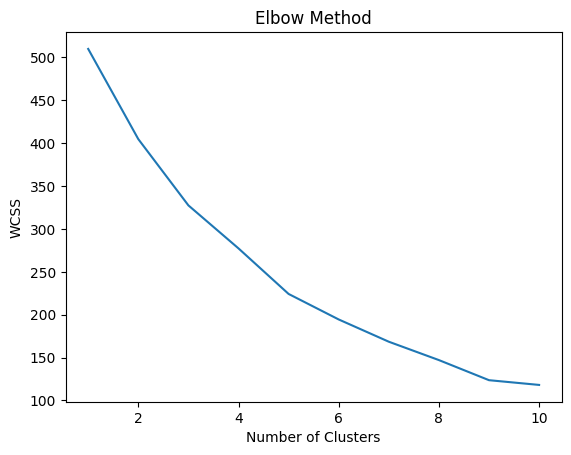

In [ ]:
# Plot the Elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS stands for "Within-Cluster Sum of Squares"
plt.show()

In [ ]:
# Based on the Elbow method, choose the optimal number of clusters
optimal_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(df_cluster_scaled)

# Add the cluster labels to the original DataFrame
df_cleaned['Cluster'] = cluster_labels

# Display the DataFrame with cluster labels
print(df_cleaned[['Respondent_ID', 'CURRENT YEAR REVENUE', 'Cluster']])

     Respondent_ID  CURRENT YEAR REVENUE  Cluster
0                1                  2.10        0
1                2                  1.70        1
2                3                  1.00        0
3                4                  0.80        2
4                5                  2.00        2
..             ...                   ...      ...
98              99                  0.06        2
99             100                  4.70        2
100            101                  0.50        2
101            102                  0.50        0
102            103                  1.00        2

[102 rows x 3 columns]


<ipython-input-55-6fb42ef3005e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = cluster_labels


In [ ]:
df_cleaned.to_csv('data_clustered')

## Regressions Analysis

In [ ]:
y = df_cleaned['CURRENT YEAR REVENUE']
X =  sm.add_constant(df_cleaned[[ '2', '5B', '5D', '5C']])

In [ ]:
X

,const,2,5B,5D,5C
0,1.0,1,0,1,1
1,1.0,0,1,1,2
2,1.0,1,0,0,1
3,1.0,1,1,0,3
4,1.0,1,1,1,1
...,...,...,...,...,...
98,1.0,1,1,0,1
99,1.0,1,1,0,2
100,1.0,1,1,0,1
101,1.0,1,0,1,2


In [ ]:
# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the regression results
print(model.summary())

                             OLS Regression Results                             
Dep. Variable:     CURRENT YEAR REVENUE   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                 -0.036
Method:                   Least Squares   F-statistic:                    0.1168
Date:                  Wed, 13 Mar 2024   Prob (F-statistic):              0.976
Time:                          10:02:44   Log-Likelihood:                -191.71
No. Observations:                   102   AIC:                             393.4
Df Residuals:                        97   BIC:                             406.6
Df Model:                             4                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0901      0.658

In [ ]:
df.columns

Index(['Unnamed: 0', 'Respondent_ID', '2', '2B', '3B', '4B', '4C', '4D', '5',
       '5B', '5C', '5D', '5E', '5F'],
      dtype='object')

In [ ]:
from scipy.stats import f_oneway

# Assuming you have a DataFrame named 'df_responses' with Likert scale responses
# and another DataFrame named 'df_performance' with financial performance data

# Example DataFrames
columns = ['2', '2B', '3B', '4B', '4C', '4D', '5', '5B', '5C', '5D', '5E', '5F']
df_responses = df_cleaned[columns]
df_performance = df_cleaned['CURRENT YEAR REVENUE']

# Combine Likert scale responses and financial performance data into one DataFrame
df = pd.concat([df_responses, df_performance], axis=1)

# Perform ANOVA for each independent variable
independent_vars = ['2', '2B', '3B', '4B', '4C', '4D', '5', '5B', '5C', '5D', '5E', '5F']

for var in independent_vars:
    f_statistic, p_value = f_oneway(*[group['CURRENT YEAR REVENUE'] for name, group in df.groupby(var)])

    print(f"\nANOVA for {var}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: There are significant differences.")
    else:
        print("Fail to reject the null hypothesis: No significant differences.")



ANOVA for 2:
F-statistic: 0.20672465914362698
P-value: 0.6503322537461456
Fail to reject the null hypothesis: No significant differences.

ANOVA for 2B:
F-statistic: 0.44100196205465636
P-value: 0.7241942173415773
Fail to reject the null hypothesis: No significant differences.

ANOVA for 3B:
F-statistic: 0.5577418362637822
P-value: 0.6938555652971679
Fail to reject the null hypothesis: No significant differences.

ANOVA for 4B:
F-statistic: 3.3902754874398195
P-value: 0.01217948164981665
Reject the null hypothesis: There are significant differences.

ANOVA for 4C:
F-statistic: 0.03641974205674095
P-value: 0.8490381962888321
Fail to reject the null hypothesis: No significant differences.

ANOVA for 4D:
F-statistic: 0.2125712917977629
P-value: 0.8088707300585161
Fail to reject the null hypothesis: No significant differences.

ANOVA for 5:
F-statistic: 0.12216044957305967
P-value: 0.8851395542621242
Fail to reject the null hypothesis: No significant differences.

ANOVA for 5B:
F-statisti

In [ ]:
df.columns

Index(['2', '2B', '3B', '4B', '4C', '4D', '5', '5B', '5C', '5D', '5E', '5F',
       'CURRENT YEAR REVENUE'],
      dtype='object')

In [ ]:
# Define the independent variables
X = df[['3B']]

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Define the dependent variable
y = df['4B']

# Fit the OLS model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     4B   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.751
Date:                Wed, 13 Mar 2024   Prob (F-statistic):              0.100
Time:                        10:15:57   Log-Likelihood:                -142.50
No. Observations:                 102   AIC:                             289.0
Df Residuals:                     100   BIC:                             294.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9553      0.393      7.515      0.0

In [ ]:
data.columns

In [ ]:
# Selecting columns for correlation analysis
columns = ['2', '2B', '3B', '4B', '4C', '4D', '5','5B', '5C', '5D', '5E', '5F']
columns_for_correlation = data[columns]
# Create a mapping to group columns by their general categories
column_groups = {
    '2': ['2', '2B'],
    '3': ['3B'],
    '4': ['4B', '4C', '4D'],
    '5': ['5','5B', '5C', '5D', '5E', '5F']
}

# Calculate Pearson correlation coefficients for general categories
correlation_matrix_general = pd.DataFrame(index=column_groups.keys(), columns=column_groups.keys())

for col1 in column_groups:
    for col2 in column_groups:
        corr, _ = pearsonr(data[column_groups[col1]].mean(axis=1), data[column_groups[col2]].mean(axis=1))
        correlation_matrix_general.loc[col1, col2] = corr

# Display the correlation matrix for general categories
print(correlation_matrix_general)

In [ ]:
# Define the sentiment distributions
sentiment_distribution_5D = [0.6, 0.2, 0.1, 0.05, 0.05]  # Strongly agree, agree, neutral, disagree, strongly disagree
sentiment_distribution_5E = [0.05, 0.05, 0.05, 0.3, 0.55]  # Strongly agree, agree, neutral, disagree, strongly disagree
sentiment_distribution_5F = [0.25, 0.35, 0.1, 0.15, 0.15]  # Strongly agree, agree, neutral, disagree, strongly disagree

# Generate responses for each section
responses_5D = np.random.choice([1,2,3,4,5], size=102, p=sentiment_distribution_5D)
responses_5E = np.random.choice([1,2,3,4,5], size=102, p=sentiment_distribution_5E)
responses_5F = np.random.choice([1,2,3,4,5], size=102, p=sentiment_distribution_5F)

# Create a DataFrame with the responses
df_simulate = pd.DataFrame({'5D': responses_5D, '5E': responses_5E, '5F': responses_5F})

# Display the DataFrame
print(df_simulate.head())


   5D  5E  5F
0   1   5   5
1   2   5   4
2   2   5   2
3   2   4   2
4   1   5   1


In [ ]:
len(df_simulate['5D'])

102

In [ ]:
# Define independent variables (features) and dependent variable (target)
df_simulate['4D'] = df['4D']

In [ ]:
df_simulate

,5D,5E,5F,4D
0,1,5,5,1.0
1,2,5,4,1.0
2,2,5,2,2.0
3,2,4,2,2.0
4,1,5,1,1.0
...,...,...,...,...
97,2,4,1,2.0
98,1,5,4,1.0
99,1,5,2,1.0
100,1,5,1,2.0


In [ ]:
df_simulate.fillna(0, inplace=True)

In [ ]:
X = df_simulate[['5D', '5E', '5F']]

# Add constant to independent variables
X = sm.add_constant(X)

y = df_simulate['4D']
# Fit OLS regression model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())

KeyError: '4D'